# Rozwiazywanie równań dynamiki Newtona z automatyczną  ̨ kontrola błędu i  doborem kroku czasowego

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import time

In [ ]:
sns.set(font="Times New Roman")
sns.set_context("paper", font_scale=1.2)


## Zadanie 1

In [ ]:
# Jednostka astronomiczna 

au = 149597870700

# Położenie komety

x = 0
y = 0.586*au # au

# Prędkość komety

Vx = 54600 # m/s
Vy = 0

# Masa słońca

M = 1.989 * 10**30 # kg

# Stała grawitacyjna 

G = 6.6741 * 10**(-11) # m^3/kg/s^2



# Czas

T = 75 * 365 * 24  * 3 *3600

## Zadanie 2


### A

In [ ]:
def diff(x):
    return 2*x*np.exp(-x**2)-1.2*(-2*x+4)*np.exp(-(x-2)**2)


def euler_H(T,xn,yn,vxn,vyn,dt=3600):
    x = [xn]
    y = [yn]
    time = [0]
    vx = vxn
    vy = vyn
    t=T/dt
    for i in range(int(t)):
        r = np.sqrt(x[-1]**2+y[-1]**2)
        tempx = x[-1]
        tempy = y[-1]
        x.append(x[-1] + vx*dt)
        y.append(y[-1] + vy*dt)
        vx = vx - G*(M/r**3)*tempx*dt
        vy = vy - G*(M/r**3)*tempy*dt
        time.append(time[i]+dt)
        
    return x,y,time

In [ ]:
tic = time.perf_counter() 
xh,yh,th = euler_H(T,x,y,Vx,Vy,dt=3600)
toc = time.perf_counter()
print(toc-tic)

16.259774520000008


In [ ]:
tic = time.perf_counter() 
xh2,yh2,th2 = euler_H(T,x,y,Vx,Vy,dt=900)
toc = time.perf_counter()
print(toc-tic)

69.59333788599997


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


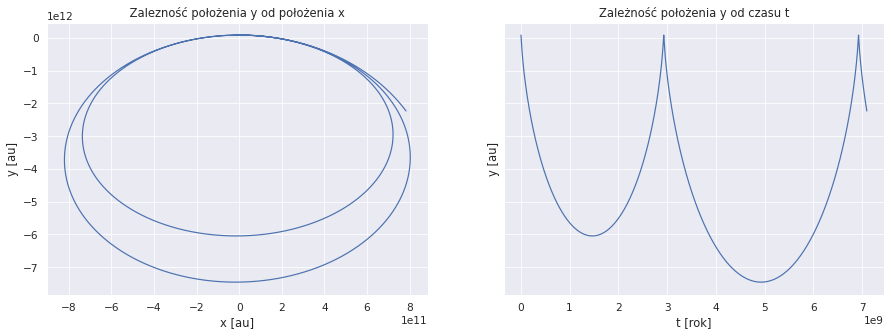

In [ ]:
fig, (ax0,ax1) = plt.subplots(1,2,sharey=True,figsize=(15,5))

ax0.plot(xh,yh)

ax0.set(xlabel='x [au]', ylabel='y [au]',
       title=' Zalezność położenia y od położenia x ')

ax1.plot(th,yh)

ax1.set(xlabel='t [rok]', ylabel='y [au]',
       title='Zależność położenia y od czasu t')


plt.show()

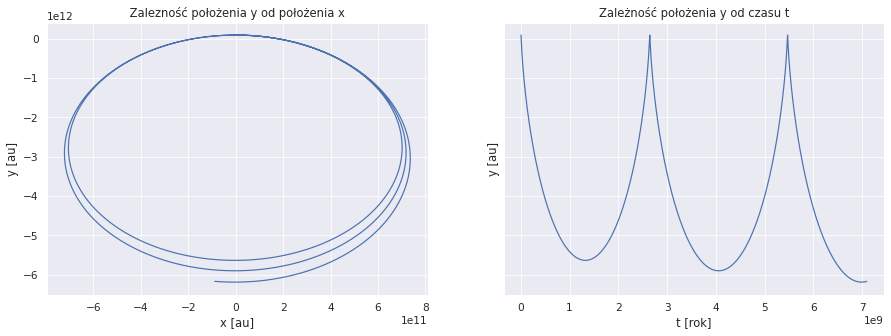

In [ ]:
fig, (ax0,ax1) = plt.subplots(1,2,sharey=True,figsize=(15,5))

ax0.plot(xh2,yh2)

ax0.set(xlabel='x [au]', ylabel='y [au]',
       title=' Zalezność położenia y od położenia x ')

ax1.plot(th2,yh2)

ax1.set(xlabel='t [rok]', ylabel='y [au]',
       title='Zależność położenia y od czasu t')


plt.show()

## Zadanie 3

In [ ]:
def ax(x,y):
    r=np.sqrt(x**2+y**2)
    return -G*M*x/r**3

def ay(x,y):
    r=np.sqrt(x**2+y**2)
    return -G*M*y/r**3



In [ ]:
def RK(x0,y0,vx0,vy0,dt):
  
    uk00=x0
    uk01=y0
    uk02=vx0
    uk03=vy0
    
    xk00=uk02
    xk01=uk03
    xk02=ax(uk00,uk01)
    xk03=ay(uk00,uk01)
        
    xk10=uk02+xk02*dt/2
    xk11=uk03+xk03*dt/2
    xk12=ax(uk00+dt/2*xk00,uk01+dt/2*xk01)
    xk13=ay(uk00+dt/2*xk00,uk01+dt/2*xk01)
        
    xk20=uk02+xk12*dt/2
    xk21=uk03+xk13*dt/2
    xk22=ax(uk00+dt/2*xk10,uk01+dt/2*xk11)
    xk23=ay(uk00+dt/2*xk10,uk01+dt/2*xk11)
    
        
    xk30=uk02+xk22*dt
    xk31=uk03+xk23*dt
    xk32=ax(uk00+dt*xk20,uk01+dt*xk21)
    xk33=ay(uk00+dt*xk20,uk01+dt*xk21)
        
    
    x=uk00+dt/6*(xk00+xk30+2*xk10+2*xk20)
    y=uk01+dt/6*(xk01+xk31+2*xk11+2*xk21)
    vx=uk02+dt/6*(xk02+xk32+2*xk12+2*xk22)
    vy=uk03+dt/6*(xk03+xk33+2*xk13+2*xk23)
    
    
    return x,y,vx,vy
    
    

In [ ]:
def RK_c(x0,y0,vx0,vy0,dt):
    x1=[x0]
    y1=[y0]
    vx=vx0
    vy=vy0
    t1 = [0]
    
    for j in range(int(T/dt)):
        
        tempx = x1[-1]
        tempy = y1[-1]
        
        
        x,y,vx,vy  = RK(tempx,tempy,vx,vy,dt)
    
        x1.append(x)
        y1.append(y)
        t1.append(t1[j]+dt)
    
    return x1,y1,t1

In [ ]:
tic = time.perf_counter() 
xR,yR,tR = RK_c(x,y,Vx,Vy,dt=3600)
toc = time.perf_counter()
print(toc-tic)

106.83073244499974


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


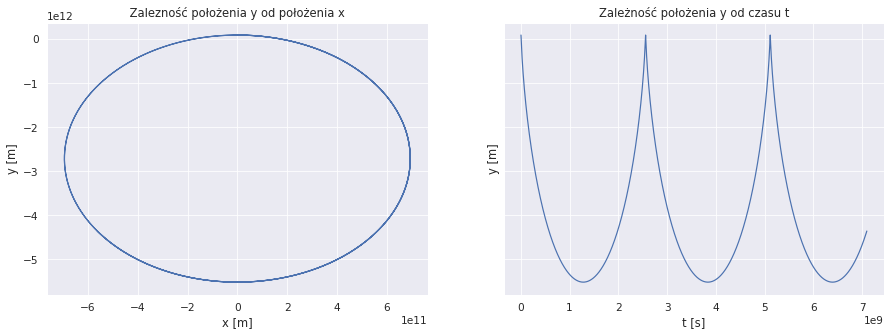

In [ ]:
fig, (ax0,ax1) = plt.subplots(1,2,sharey=True,figsize=(15,5))

ax0.plot(xR,yR)

ax0.set(xlabel='x [m]', ylabel='y [m]',
       title=' Zalezność położenia y od położenia x ')

ax1.plot(tR,yR)

ax1.set(xlabel='t [s]', ylabel='y [m]',
       title='Zależność położenia y od czasu t')


plt.show()

## Zadanie 4 

In [ ]:
def blad(u1,u2,n):
    return (u1-u2)/(2**n-1)

def nowykrok(eps,dt,n,tol,c=0.9):
    return c*dt*(tol/abs(eps))**(1/(n+1))

def V(x,v,r,dt):
    return v - G*M*x*dt/r**3

def P(x,v,dt):
    return x+v*dt

In [ ]:
def euler_H_k(T,xn,yn,vxn,vyn,tol=1000,c=0.9,dt=3600):
    x = [xn]
    y = [yn]
    t1 = [0]
    vx = [vxn]
    vy = [vyn]
    dt_k = []
    r = []
    t=0
    
    while(t<T):
        
        # 1 krok
        r1 = np.sqrt(x[-1]**2+y[-1]**2)
        
        tempx = x[-1]
        tempy = y[-1]
        tempvx = vx[-1]
        tempvy = vy[-1]
        
        x1 = P(tempx,tempvx,dt)
        y1 = P(tempy,tempvy,dt)
        
        vx1 = V(tempx,tempvx,r1,dt)
        vy1 = V(tempy,tempvy,r1,dt)
        
        
        # 2.1 krok
        x2_1 = P(tempx,tempvx,dt/2)
        y2_1 = P(tempy,tempvy,dt/2)
        
        # 2.2 krok
        r2 =  np.sqrt(x2_1**2+y2_1**2)
        
        vx2 = V(tempx,tempvx,r1,dt/2)
        vy2 = V(tempy,tempvy,r1,dt/2)
        
        vx2 = V(x2_1,vx2,r2,dt/2)
        vy2 = V(y2_1,vy2,r2,dt/2)
        
        x2_2 = P(x2_1,vx2,dt/2)
        y2_2 = P(y2_1,vy2,dt/2)
        
        # wyznaczenie eps
        
        epsx = blad(x2_2,x1,1)
        epsy = blad(y2_2,y1,1)
    
        
        if (abs(epsx)>abs(epsy)):
            eps = epsx
        else:
            eps = epsy
            
        # sprawdzenie czy eps mniejszy niż tolerancja
        
        if(eps<=tol):
            t1.append(t1[-1]+dt)
            x.append(x1)
            y.append(y1)
            vx.append(vx1)
            vy.append(vy1)
            dt_k.append(dt)
            r.append(r1)
            t+=dt
        dt = nowykrok(eps,dt,1,tol)
        
        
        
    return x,y,t1,r,dt_k


In [ ]:
tic = time.perf_counter() 
xk,yk,tk,rk,dtk = euler_H_k(T,x,y,Vx,Vy,dt=3600)
toc = time.perf_counter()
print(toc-tic)

14.262921429000016


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


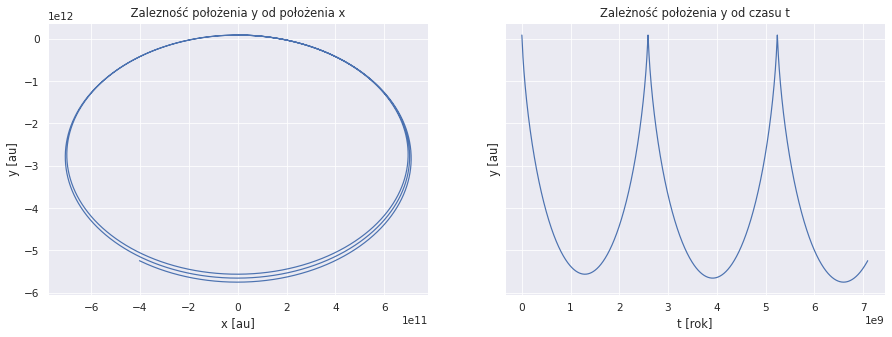

In [ ]:
fig, (ax0,ax1) = plt.subplots(1,2,sharey=True,figsize=(15,5))

ax0.plot(xk,yk)

ax0.set(xlabel='x [au]', ylabel='y [au]',
       title=' Zalezność położenia y od położenia x ')

ax1.plot(tk,yk)

ax1.set(xlabel='t [rok]', ylabel='y [au]',
       title='Zależność położenia y od czasu t')



plt.show()

In [ ]:

rk1 = [rk/au for rk in rk]


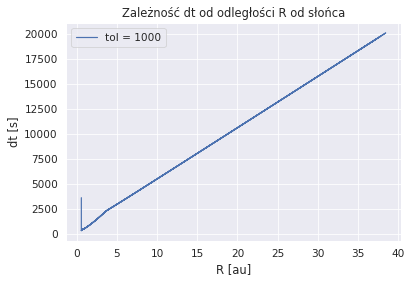

In [ ]:
plt.plot(rk1,dtk)
plt.legend(['tol = 1000'])
plt.xlabel('R [au]')
plt.ylabel('dt [s]')
plt.title("Zależność dt od odległości R od słońca")
plt.show()

In [ ]:
tic = time.perf_counter() 
xk11,yk11,tk11,rk11,dtk11 = euler_H_k(T,x,y,Vx,Vy,tol=1,dt=3600)
toc = time.perf_counter()
print(toc-tic)

456.19603393700004


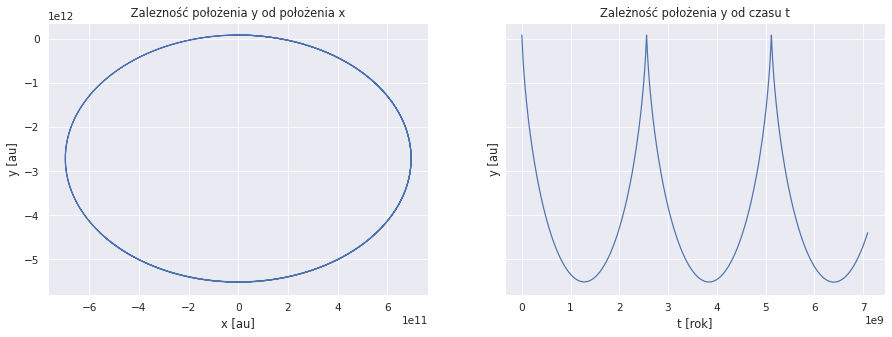

In [ ]:
fig, (ax0,ax1) = plt.subplots(1,2,sharey=True,figsize=(15,5))

ax0.plot(xk11,yk11)

ax0.set(xlabel='x [au]', ylabel='y [au]',
       title=' Zalezność położenia y od położenia x ')

ax1.plot(tk11,yk11)

ax1.set(xlabel='t [rok]', ylabel='y [au]',
       title='Zależność położenia y od czasu t')



plt.show()

In [ ]:
rk2 = [rk/au for rk in rk11]


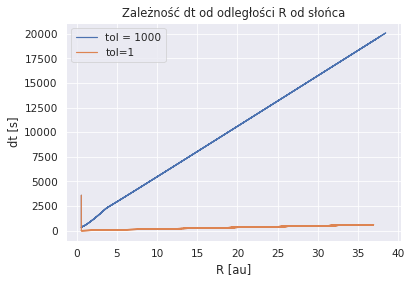

In [ ]:
plt.plot(rk1,dtk,rk2,dtk11)
plt.legend(['tol = 1000', 'tol=1'])
plt.xlabel('R [au]')
plt.ylabel('dt [s]')
plt.title("Zależność dt od odległości R od słońca")
plt.show()

### RK AUTOMAT

In [ ]:
def RK_at(T,xn,yn,vxn,vyn,tol=1000,c=0.9,dt0=3600):
    x = [xn]
    y = [yn]
    vx = vxn
    vy = vyn
    dt_k = [dt0]
    r = []
    t = [0]
    dt=dt0
    
    while(t[-1]<T):
        tempx = x[-1]
        tempy = y[-1]
        
        
        x1,y1,vx1,vy1 = RK(tempx,tempy,vx,vy,dt)
        
        x2,y2,vx2,vy2 = RK(tempx,tempy,vx,vy,dt/2)
        
        x3,y3,vx3,vy3 = RK(x2,y2,vx2,vy2,dt/2)
        
        r1 = np.sqrt(x1**2+y1**2)
        
        # wyznaczenie eps
        
        epsx = blad(x3,x1,4)
        epsy = blad(y3,y1,4)
        
        if (abs(epsx)>abs(epsy)):
            eps = epsx
        else:
            eps = epsy
        
        
         # sprawdzenie czy eps mniejszy niż tolerancja
        
        if(eps<=tol):
            t.append(t[-1]+dt)
            x.append(x1)
            y.append(y1)
            vx=vx1
            vy=vy1
            dt_k.append(dt)
            r.append(r1)
            
        dt = nowykrok(eps,dt,4,tol)
        
        
        
    return x,y,t,dt_k,r

In [ ]:
tic = time.perf_counter() 
xk3,yk3,tk3,dtk3,rk3 = RK_at(T,x,y,Vx,Vy,dt0=3600)
toc = time.perf_counter()
print(toc-tic)

0.12510397400001239


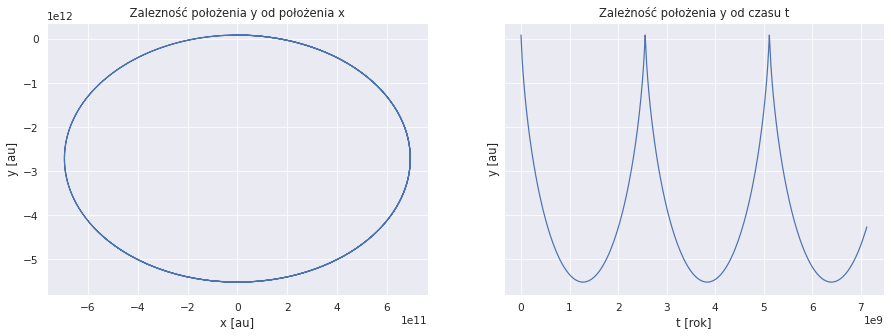

In [ ]:
fig, (ax0,ax1) = plt.subplots(1,2,sharey=True,figsize=(15,5))

ax0.plot(xk3,yk3)

ax0.set(xlabel='x [au]', ylabel='y [au]',
       title=' Zalezność położenia y od położenia x ')

ax1.plot(tk3,yk3)

ax1.set(xlabel='t [rok]', ylabel='y [au]',
       title='Zależność położenia y od czasu t')


plt.show()

In [ ]:
tic = time.perf_counter() 
xk4,yk4,tk4,dtk4,rk4 = RK_at(T,x,y,Vx,Vy,tol=1,dt0=3600)
toc = time.perf_counter()
print(toc-tic)

0.40442944099959277


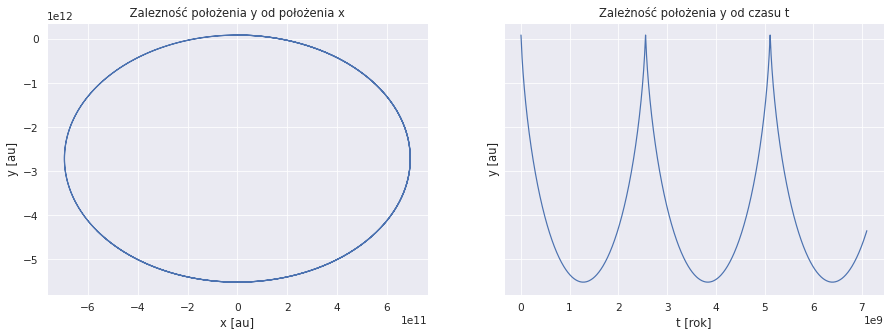

In [ ]:
fig, (ax0,ax1) = plt.subplots(1,2,sharey=True,figsize=(15,5))

ax0.plot(xk4,yk4)

ax0.set(xlabel='x [au]', ylabel='y [au]',
       title=' Zalezność położenia y od położenia x ')

ax1.plot(tk4,yk4)

ax1.set(xlabel='t [rok]', ylabel='y [au]',
       title='Zależność położenia y od czasu t')


plt.show()

In [ ]:
rk31 = [rk/au for rk in rk3]


rk41 = [rk/au for rk in rk4]


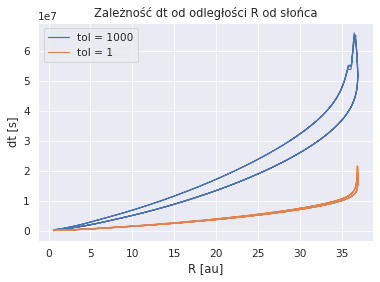

In [ ]:
plt.plot(rk31,dtk3[0:-1],rk41,dtk4[0:-1])
plt.legend(['tol = 1000','tol = 1'])
plt.xlabel('R [au]')
plt.ylabel('dt [s]')
plt.title("Zależność dt od odległości R od słońca")
plt.show()